In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

%matplotlib inline

<h2>Load Data</h2>

In [3]:
input_df = pd.read_csv('website-traffic.csv')
input_df['date_of_visit'] = pd.to_datetime(input_df.MonthDay.str.cat(input_df.Year.astype(str), sep=' '))

input_df[['date_of_visit', 'Visits']].head(10) 

,date_of_visit,Visits
0,2009-06-01,27
1,2009-06-02,31
2,2009-06-03,38
3,2009-06-04,38
4,2009-06-05,31
5,2009-06-06,24
6,2009-06-07,21
7,2009-06-08,29
8,2009-06-09,30
9,2009-06-10,22


<h2>Plot Time Series</h2>

<AxesSubplot:title={'center':'Website Visits per Day'}, xlabel='date_of_visit'>

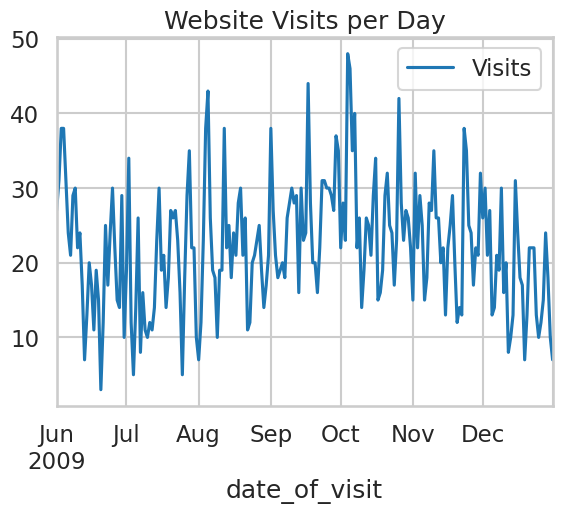

In [5]:
input_df.plot(x='date_of_visit', y='Visits', title="Website Visits per Day")

<h2>Plot Time Series Constituents</h2>

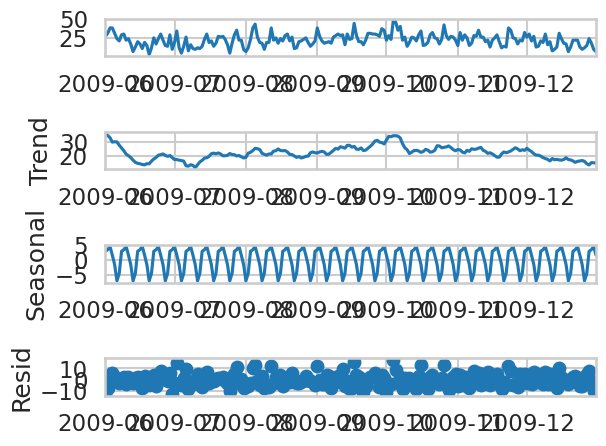

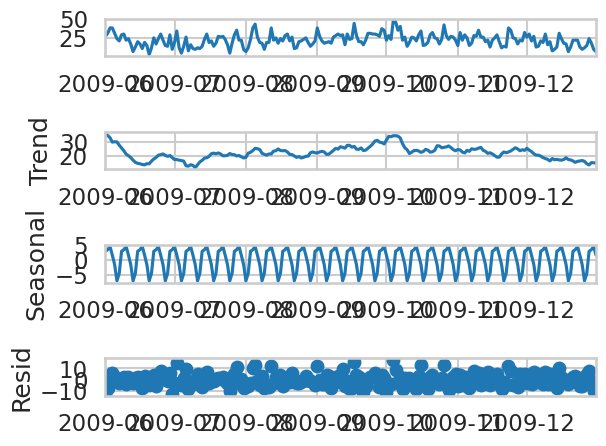

In [14]:
ts_visits = pd.Series(input_df.Visits.values, index=pd.date_range(input_df.date_of_visit.min(), input_df.date_of_visit.max(), freq='D'))
decompose = seasonal_decompose(ts_visits.interpolate(), extrapolate_trend='freq')
decompose.plot()